In [23]:
from os.path import join, curdir, abspath, isfile
import numpy as np
import pandas as pd
import keras
import tensorflow as tf
from matplotlib.image import imread
from sklearn.model_selection import train_test_split
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, Conv2D, MaxPooling2D, MaxPooling1D, Dense, Flatten, Dropout, SeparableConv1D, AveragePooling2D
from tensorflow.keras.layers import GlobalAveragePooling2D
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
from PIL import Image
import keras
from keras.models import Sequential
from keras import optimizers
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D , LeakyReLU
from keras.layers import Conv2D, Dense, Activation, Dropout, MaxPool2D, Flatten, LeakyReLU
from tensorflow.keras.callbacks import TensorBoard, ModelCheckpoint

In [16]:
df = pd.read_csv("./faces/train.csv")
df.head()

,ID,Class
0,377.jpg,MIDDLE
1,17814.jpg,YOUNG
2,21283.jpg,MIDDLE
3,16496.jpg,YOUNG
4,4487.jpg,MIDDLE


In [3]:
df.describe()

,ID,Class
count,19906,19906
unique,19906,3
top,377.jpg,MIDDLE
freq,1,10804


<Axes: >

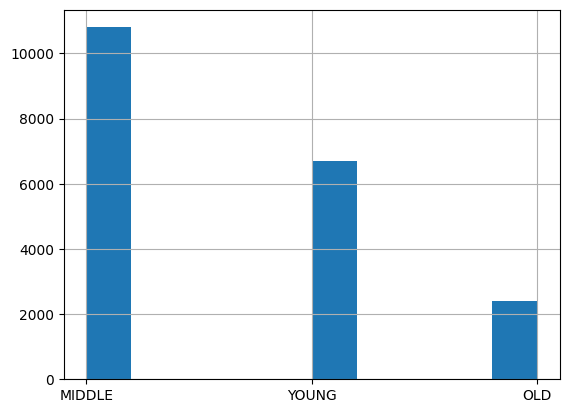

In [73]:
df['Class'].hist()

In [17]:
pic_path = join(curdir, 'faces', 'Train')
pic_class = []
pic_array = []
for file_name, clf in df[['ID','Class']].itertuples(index=False):
    pic_file = join(pic_path, file_name)
    if isfile(pic_file):
        pic_class.append(clf)
        img = Image.open(pic_file).resize((50, 50))
        pic_array.append(np.array(img))

In [18]:
pic_array = np.array(pic_array)
pic_class = np.array(pic_class)

In [19]:
def age2int(x):
    if x=='MIDDLE':
        return 1
    elif x == 'YOUNG':
        return 2
    else:
        return 3
    
y = list(map(age2int, pic_class))

In [20]:
X_train, X_test, y_train, y_test = train_test_split(pic_array, y, test_size=0.2, random_state=42)

In [21]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [10]:
y_train.shape, y_test.shape

((15924, 4), (3982, 4))

In [71]:
def draw_train_loss(final_cnn_history):
    train_loss = final_cnn_history.history['loss']
    test_loss = final_cnn_history.history['val_loss']
    train_accuracy = final_cnn_history.history['accuracy']
    test_accuracy = final_cnn_history.history['val_accuracy']

    # Plotting a line chart to visualize the loss and accuracy values by epochs.
    fig, ax = plt.subplots(ncols=2, figsize=(15,7))
    ax = ax.ravel()
    ax[0].plot(train_loss, label='Train Loss', color='royalblue', marker='o', markersize=5)
    ax[0].plot(test_loss, label='Test Loss', color = 'orangered', marker='o', markersize=5)
    ax[0].set_xlabel('Epochs', fontsize=14)
    ax[0].set_ylabel('Categorical Crossentropy', fontsize=14)
    ax[0].legend(fontsize=14)
    ax[0].tick_params(axis='both', labelsize=12)
    ax[1].plot(train_accuracy, label='Train Accuracy', color='royalblue', marker='o', markersize=5)
    ax[1].plot(test_accuracy, label='Test Accuracy', color='orangered', marker='o', markersize=5)
    ax[1].set_xlabel('Epochs', fontsize=14)
    ax[1].set_ylabel('Accuracy', fontsize=14)
    ax[1].legend(fontsize=14)
    ax[1].tick_params(axis='both', labelsize=12)
    fig.suptitle(x=0.5, y=0.92, t="Lineplots showing loss and accuracy of CNN model by epochs", fontsize=16)

In [ ]:
def compile_and_fit(model):
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    model_history = model.fit(X_train,
                                  y_train,
                                  batch_size=512,
                                  validation_data=(X_test,y_test),
                                  epochs=60,
                                  shuffle=False  
                                 )
    return model_history
    

In [34]:
first_cnn = Sequential()
first_cnn.add(Conv2D(filters=32, kernel_size=3, activation='relu', input_shape=(50, 50, 3)))    # 3rd dim = 1 for grayscale images.
first_cnn.add(AveragePooling2D(pool_size=(2,2)))
first_cnn.add(Conv2D(filters=64, kernel_size=3, activation='relu'))
first_cnn.add(AveragePooling2D(pool_size=(2,2)))
first_cnn.add(Conv2D(filters=128, kernel_size=3, activation='relu'))
first_cnn.add(AveragePooling2D(pool_size=(2,2)))
first_cnn.add(Conv2D(filters=256, kernel_size=3, activation='relu'))
first_cnn.add(AveragePooling2D(pool_size=(2,2)))
first_cnn.add(GlobalAveragePooling2D())
first_cnn.add(Dense(132, activation='relu'))
first_cnn.add(Dense(4, activation='softmax'))
first_cnn.summary()

c:\Users\Ahmad\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_25 (Conv2D)              │ (None, 48, 48, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ average_pooling2d_8             │ (None, 24, 24, 32)     │             0 │
│ (AveragePooling2D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_26 (Conv2D)              │ (None, 22, 22, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ average_pooling2d_9             │ (None, 11, 11, 64)     │             0 │
│ (AveragePooling2D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_27 (Conv2D)              │ (None, 9, 9, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ average_pooling2d_10            │ (None, 4, 4, 128)      │             0 │
│ (AveragePooling2D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_28 (Conv2D)              │ (None, 2, 2, 256)      │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ average_pooling2d_11            │ (None, 1, 1, 256)      │             0 │
│ (AveragePooling2D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_2      │ (None, 256)            │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 132)            │        33,924 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 4)              │           532 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 422,872 (1.61 MB)

 Trainable params: 422,872 (1.61 MB)

 Non-trainable params: 0 (0.00 B)

In [36]:
first_cnn_history = compile_and_fit(first_cnn)

Epoch 1/60
32/32 ━━━━━━━━━━━━━━━━━━━━ 23s 580ms/step - accuracy: 0.4549 - loss: 2.5710 - val_accuracy: 0.5879 - val_loss: 0.9039
Epoch 2/60
32/32 ━━━━━━━━━━━━━━━━━━━━ 19s 600ms/step - accuracy: 0.5841 - loss: 0.8839 - val_accuracy: 0.6193 - val_loss: 0.8417
Epoch 3/60
32/32 ━━━━━━━━━━━━━━━━━━━━ 20s 631ms/step - accuracy: 0.6183 - loss: 0.8287 - val_accuracy: 0.6283 - val_loss: 0.8100
Epoch 4/60
32/32 ━━━━━━━━━━━━━━━━━━━━ 19s 593ms/step - accuracy: 0.6385 - loss: 0.7953 - val_accuracy: 0.6703 - val_loss: 0.7527
Epoch 5/60
32/32 ━━━━━━━━━━━━━━━━━━━━ 17s 524ms/step - accuracy: 0.6725 - loss: 0.7501 - val_accuracy: 0.6841 - val_loss: 0.7333
Epoch 6/60
32/32 ━━━━━━━━━━━━━━━━━━━━ 17s 523ms/step - accuracy: 0.6814 - loss: 0.7221 - val_accuracy: 0.7049 - val_loss: 0.7082
Epoch 7/60
32/32 ━━━━━━━━━━━━━━━━━━━━ 17s 524ms/step - accuracy: 0.7030 - loss: 0.6924 - val_accuracy: 0.7024 - val_loss: 0.7033
Epoch 8/60
32/32 ━━━━━━━━━━━━━━━━━━━━ 20s 635ms/step - accuracy: 0.7116 - loss: 0.6789 - val_accu

Text(0.5, 0.92, 'Lineplots showing loss and accuracy of CNN model by epochs')

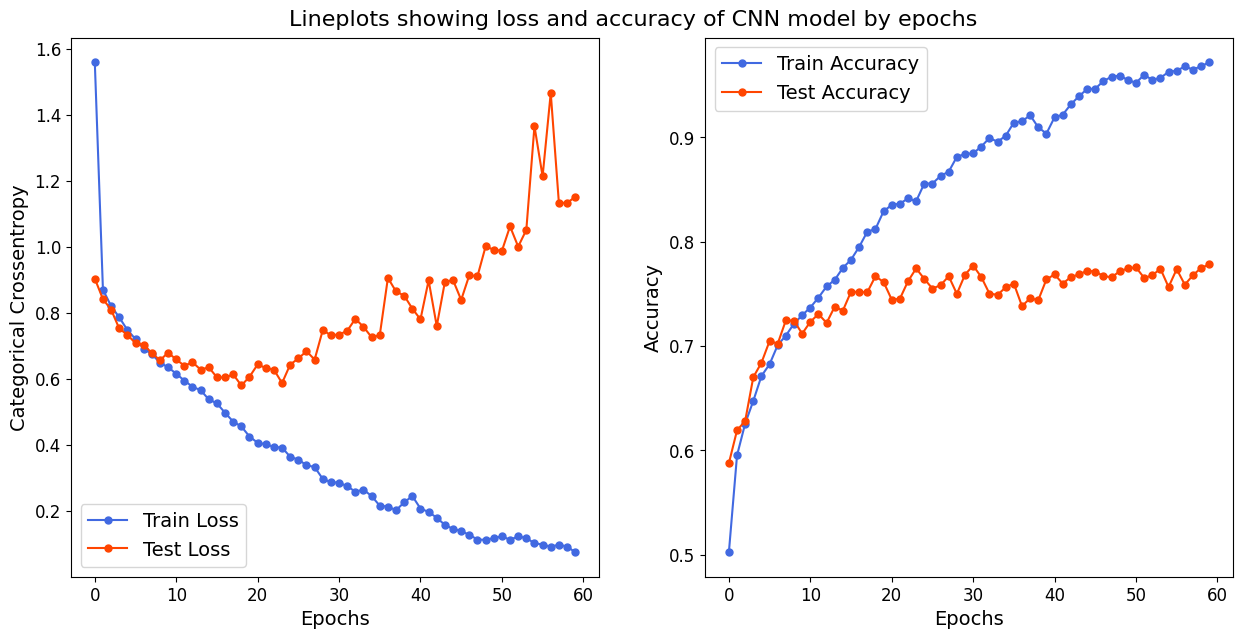

In [37]:
draw_train_loss(first_cnn_history)

In [38]:
second_cnn = Sequential()
second_cnn.add(Conv2D(filters=32, kernel_size=3, activation='relu', input_shape=(50, 50, 3)))    # 3rd dim = 1 for grayscale images.
second_cnn.add(AveragePooling2D(pool_size=(2,2)))
second_cnn.add(Conv2D(filters=64, kernel_size=3, activation='relu'))
second_cnn.add(AveragePooling2D(pool_size=(2,2)))
second_cnn.add(Conv2D(filters=128, kernel_size=3, activation='relu'))
second_cnn.add(AveragePooling2D(pool_size=(2,2)))
second_cnn.add(GlobalAveragePooling2D())
second_cnn.add(Dense(132, activation='relu'))
second_cnn.add(Dropout(0.25))
second_cnn.add(Dense(4, activation='softmax'))
second_cnn.summary()

c:\Users\Ahmad\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_29 (Conv2D)              │ (None, 48, 48, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ average_pooling2d_12            │ (None, 24, 24, 32)     │             0 │
│ (AveragePooling2D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_30 (Conv2D)              │ (None, 22, 22, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ average_pooling2d_13            │ (None, 11, 11, 64)     │             0 │
│ (AveragePooling2D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_31 (Conv2D)              │ (None, 9, 9, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ average_pooling2d_14            │ (None, 4, 4, 128)      │             0 │
│ (AveragePooling2D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_3      │ (None, 128)            │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 132)            │        17,028 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 132)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 4)              │           532 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 110,808 (432.84 KB)

 Trainable params: 110,808 (432.84 KB)

 Non-trainable params: 0 (0.00 B)

In [42]:
second_cnn_history = compile_and_fit(second_cnn)

Epoch 1/60
32/32 ━━━━━━━━━━━━━━━━━━━━ 20s 488ms/step - accuracy: 0.3994 - loss: 4.5395 - val_accuracy: 0.5357 - val_loss: 0.9544
Epoch 2/60
32/32 ━━━━━━━━━━━━━━━━━━━━ 15s 471ms/step - accuracy: 0.5265 - loss: 0.9645 - val_accuracy: 0.5603 - val_loss: 0.9185
Epoch 3/60
32/32 ━━━━━━━━━━━━━━━━━━━━ 15s 464ms/step - accuracy: 0.5548 - loss: 0.9250 - val_accuracy: 0.5610 - val_loss: 0.8979
Epoch 4/60
32/32 ━━━━━━━━━━━━━━━━━━━━ 15s 464ms/step - accuracy: 0.5787 - loss: 0.8919 - val_accuracy: 0.6110 - val_loss: 0.8554
Epoch 5/60
32/32 ━━━━━━━━━━━━━━━━━━━━ 15s 469ms/step - accuracy: 0.6056 - loss: 0.8602 - val_accuracy: 0.6170 - val_loss: 0.8306
Epoch 6/60
32/32 ━━━━━━━━━━━━━━━━━━━━ 15s 462ms/step - accuracy: 0.6151 - loss: 0.8456 - val_accuracy: 0.6411 - val_loss: 0.8215
Epoch 7/60
32/32 ━━━━━━━━━━━━━━━━━━━━ 15s 466ms/step - accuracy: 0.6344 - loss: 0.8136 - val_accuracy: 0.6494 - val_loss: 0.8042
Epoch 8/60
32/32 ━━━━━━━━━━━━━━━━━━━━ 15s 468ms/step - accuracy: 0.6559 - loss: 0.7805 - val_accu

Text(0.5, 0.92, 'Lineplots showing loss and accuracy of CNN model by epochs')

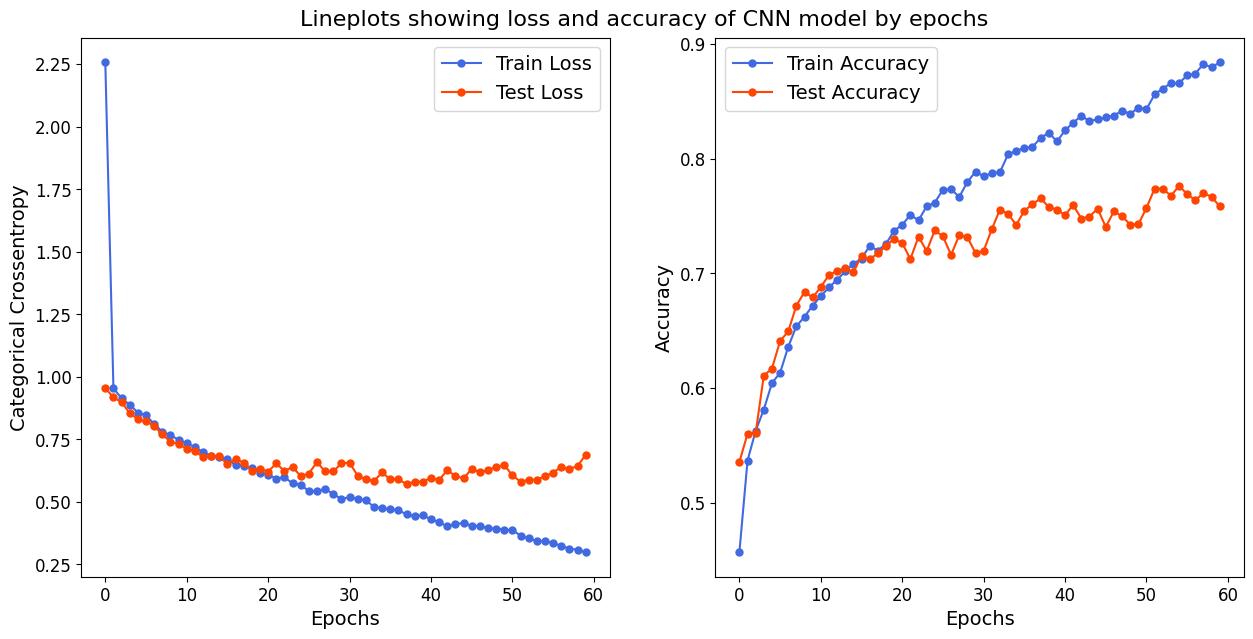

In [43]:
draw_train_loss(second_cnn_history)

In [48]:
third_cnn = Sequential()
third_cnn.add(Conv2D(filters=32, kernel_size=3, activation='relu', input_shape=(50, 50, 3)))    # 3rd dim = 1 for grayscale images.
third_cnn.add(AveragePooling2D(pool_size=(2,2)))
third_cnn.add(Conv2D(filters=64, kernel_size=3, activation='relu'))
third_cnn.add(AveragePooling2D(pool_size=(2,2)))
third_cnn.add(Conv2D(filters=128, kernel_size=3, activation='relu'))
third_cnn.add(AveragePooling2D(pool_size=(2,2)))
third_cnn.add(Conv2D(filters=256, kernel_size=3, activation='relu'))
third_cnn.add(AveragePooling2D(pool_size=(2,2)))
third_cnn.add(GlobalAveragePooling2D())
third_cnn.add(Dense(132, activation='relu'))
third_cnn.add(Dropout(0.25))
third_cnn.add(Dense(4, activation='softmax'))
third_cnn.summary()

Model: "sequential_11"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_47 (Conv2D)              │ (None, 48, 48, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ average_pooling2d_27            │ (None, 24, 24, 32)     │             0 │
│ (AveragePooling2D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_48 (Conv2D)              │ (None, 22, 22, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ average_pooling2d_28            │ (None, 11, 11, 64)     │             0 │
│ (AveragePooling2D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_49 (Conv2D)              │ (None, 9, 9, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ average_pooling2d_29            │ (None, 4, 4, 128)      │             0 │
│ (AveragePooling2D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_50 (Conv2D)              │ (None, 2, 2, 256)      │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ average_pooling2d_30            │ (None, 1, 1, 256)      │             0 │
│ (AveragePooling2D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_5      │ (None, 256)            │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 132)            │        33,924 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 132)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 4)              │           532 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 422,872 (1.61 MB)

 Trainable params: 422,872 (1.61 MB)

 Non-trainable params: 0 (0.00 B)

In [51]:
third_cnn_history = compile_and_fit(third_cnn)

Epoch 1/60
32/32 ━━━━━━━━━━━━━━━━━━━━ 30s 931ms/step - accuracy: 0.8296 - loss: 0.4229 - val_accuracy: 0.7624 - val_loss: 0.5897
Epoch 2/60
32/32 ━━━━━━━━━━━━━━━━━━━━ 25s 786ms/step - accuracy: 0.8397 - loss: 0.3885 - val_accuracy: 0.7672 - val_loss: 0.6038
Epoch 3/60
32/32 ━━━━━━━━━━━━━━━━━━━━ 15s 465ms/step - accuracy: 0.8469 - loss: 0.3760 - val_accuracy: 0.7446 - val_loss: 0.6473
Epoch 4/60
32/32 ━━━━━━━━━━━━━━━━━━━━ 14s 440ms/step - accuracy: 0.8513 - loss: 0.3650 - val_accuracy: 0.7712 - val_loss: 0.6019
Epoch 5/60
32/32 ━━━━━━━━━━━━━━━━━━━━ 14s 436ms/step - accuracy: 0.8649 - loss: 0.3379 - val_accuracy: 0.7622 - val_loss: 0.6125
Epoch 6/60
32/32 ━━━━━━━━━━━━━━━━━━━━ 14s 431ms/step - accuracy: 0.8710 - loss: 0.3280 - val_accuracy: 0.7614 - val_loss: 0.6492
Epoch 7/60
32/32 ━━━━━━━━━━━━━━━━━━━━ 14s 435ms/step - accuracy: 0.8739 - loss: 0.3177 - val_accuracy: 0.7639 - val_loss: 0.6387
Epoch 8/60
32/32 ━━━━━━━━━━━━━━━━━━━━ 15s 471ms/step - accuracy: 0.8748 - loss: 0.3081 - val_accu

Text(0.5, 0.92, 'Lineplots showing loss and accuracy of CNN model by epochs')

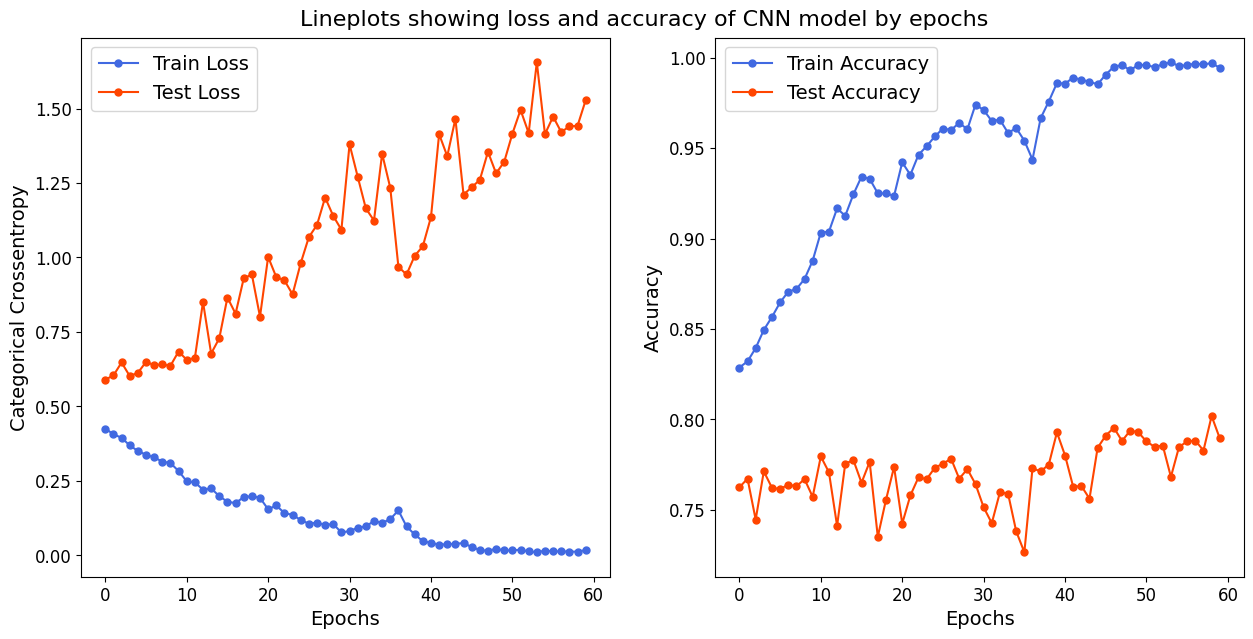

In [52]:
draw_train_loss(third_cnn_history)

In [53]:
fourth_cnn = Sequential()
fourth_cnn.add(Conv2D(filters=32, kernel_size=3, activation='relu', input_shape=(50, 50, 3)))    # 3rd dim = 1 for grayscale images.
fourth_cnn.add(AveragePooling2D(pool_size=(2,2)))
fourth_cnn.add(Conv2D(filters=64, kernel_size=3, activation='relu'))
fourth_cnn.add(AveragePooling2D(pool_size=(2,2)))

fourth_cnn.add(GlobalAveragePooling2D())
fourth_cnn.add(Dense(132, activation='relu'))
fourth_cnn.add(Dropout(0.25))
fourth_cnn.add(Dense(4, activation='softmax'))
fourth_cnn.summary()

c:\Users\Ahmad\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_12"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_51 (Conv2D)              │ (None, 48, 48, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ average_pooling2d_31            │ (None, 24, 24, 32)     │             0 │
│ (AveragePooling2D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_52 (Conv2D)              │ (None, 22, 22, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ average_pooling2d_32            │ (None, 11, 11, 64)     │             0 │
│ (AveragePooling2D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_6      │ (None, 64)             │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ (None, 132)            │         8,580 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 132)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_19 (Dense)                │ (None, 4)              │           532 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 28,504 (111.34 KB)

 Trainable params: 28,504 (111.34 KB)

 Non-trainable params: 0 (0.00 B)

In [55]:
fourth_cnn_history = compile_and_fit(fourth_cnn)

Epoch 1/60
32/32 ━━━━━━━━━━━━━━━━━━━━ 12s 328ms/step - accuracy: 0.6774 - loss: 0.7522 - val_accuracy: 0.7175 - val_loss: 0.6661
Epoch 2/60
32/32 ━━━━━━━━━━━━━━━━━━━━ 11s 334ms/step - accuracy: 0.7305 - loss: 0.6243 - val_accuracy: 0.7328 - val_loss: 0.6299
Epoch 3/60
32/32 ━━━━━━━━━━━━━━━━━━━━ 11s 346ms/step - accuracy: 0.7469 - loss: 0.6013 - val_accuracy: 0.7278 - val_loss: 0.6381
Epoch 4/60
32/32 ━━━━━━━━━━━━━━━━━━━━ 11s 348ms/step - accuracy: 0.7498 - loss: 0.6011 - val_accuracy: 0.7263 - val_loss: 0.6338
Epoch 5/60
32/32 ━━━━━━━━━━━━━━━━━━━━ 11s 344ms/step - accuracy: 0.7481 - loss: 0.5964 - val_accuracy: 0.7248 - val_loss: 0.6321
Epoch 6/60
32/32 ━━━━━━━━━━━━━━━━━━━━ 11s 345ms/step - accuracy: 0.7465 - loss: 0.5963 - val_accuracy: 0.7300 - val_loss: 0.6326
Epoch 7/60
32/32 ━━━━━━━━━━━━━━━━━━━━ 11s 347ms/step - accuracy: 0.7438 - loss: 0.5993 - val_accuracy: 0.7313 - val_loss: 0.6271
Epoch 8/60
32/32 ━━━━━━━━━━━━━━━━━━━━ 11s 349ms/step - accuracy: 0.7532 - loss: 0.5880 - val_accu

Text(0.5, 0.92, 'Lineplots showing loss and accuracy of CNN model by epochs')

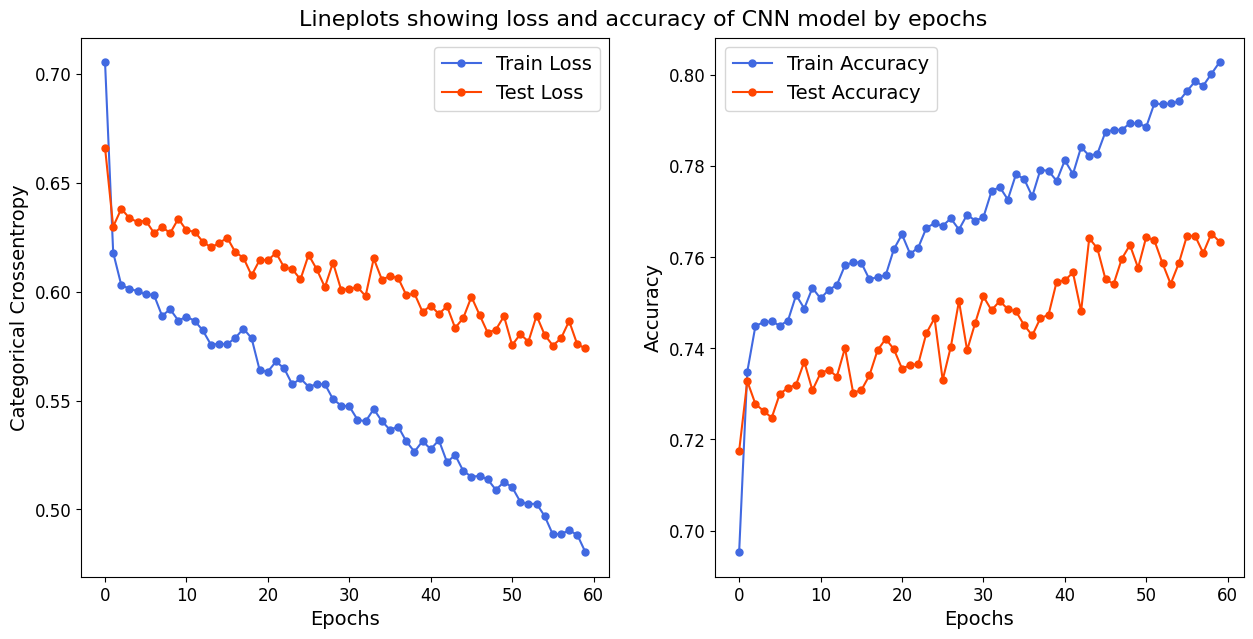

In [56]:
draw_train_loss(fourth_cnn_history)

In [60]:
fifth_cnn = Sequential()
fifth_cnn.add(Conv2D(filters=32, kernel_size=5, padding='same', activation='relu', input_shape=(50, 50, 3)))    # 3rd dim = 1 for grayscale images.
fifth_cnn.add(AveragePooling2D(pool_size=(2,2)))
fifth_cnn.add(Conv2D(filters=64, kernel_size=5, padding='same', activation='relu'))
fifth_cnn.add(AveragePooling2D(pool_size=(2,2)))
fifth_cnn.add(Flatten())
fifth_cnn.add(Dense(128, activation='relu'))
fifth_cnn.add(Dropout(0.25))
fifth_cnn.add(Dense(64, activation='relu'))
fifth_cnn.add(Dense(4, activation='softmax'))
fifth_cnn.summary()

Model: "sequential_15"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_57 (Conv2D)              │ (None, 50, 50, 32)     │         2,432 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ average_pooling2d_37            │ (None, 25, 25, 32)     │             0 │
│ (AveragePooling2D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_58 (Conv2D)              │ (None, 25, 25, 64)     │        51,264 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ average_pooling2d_38            │ (None, 12, 12, 64)     │             0 │
│ (AveragePooling2D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_4 (Flatten)             │ (None, 9216)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_26 (Dense)                │ (None, 128)            │     1,179,776 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_27 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_28 (Dense)                │ (None, 4)              │           260 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,241,988 (4.74 MB)

 Trainable params: 1,241,988 (4.74 MB)

 Non-trainable params: 0 (0.00 B)

In [61]:
fifth_cnn_history = compile_and_fit(fifth_cnn)

Epoch 1/60
32/32 ━━━━━━━━━━━━━━━━━━━━ 22s 634ms/step - accuracy: 0.4004 - loss: 13.2464 - val_accuracy: 0.6188 - val_loss: 0.8387
Epoch 2/60
32/32 ━━━━━━━━━━━━━━━━━━━━ 24s 758ms/step - accuracy: 0.6112 - loss: 0.8525 - val_accuracy: 0.6597 - val_loss: 0.7762
Epoch 3/60
32/32 ━━━━━━━━━━━━━━━━━━━━ 39s 1s/step - accuracy: 0.6547 - loss: 0.7878 - val_accuracy: 0.6899 - val_loss: 0.7202
Epoch 4/60
32/32 ━━━━━━━━━━━━━━━━━━━━ 36s 1s/step - accuracy: 0.6792 - loss: 0.7311 - val_accuracy: 0.6896 - val_loss: 0.7293
Epoch 5/60
32/32 ━━━━━━━━━━━━━━━━━━━━ 52s 2s/step - accuracy: 0.6953 - loss: 0.7001 - val_accuracy: 0.6974 - val_loss: 0.7278
Epoch 6/60
32/32 ━━━━━━━━━━━━━━━━━━━━ 50s 630ms/step - accuracy: 0.7087 - loss: 0.6723 - val_accuracy: 0.6971 - val_loss: 0.7007
Epoch 7/60
32/32 ━━━━━━━━━━━━━━━━━━━━ 25s 773ms/step - accuracy: 0.7290 - loss: 0.6267 - val_accuracy: 0.7117 - val_loss: 0.6849
Epoch 8/60
32/32 ━━━━━━━━━━━━━━━━━━━━ 29s 918ms/step - accuracy: 0.7552 - loss: 0.5811 - val_accuracy: 0.

Text(0.5, 0.92, 'Lineplots showing loss and accuracy of CNN model by epochs')

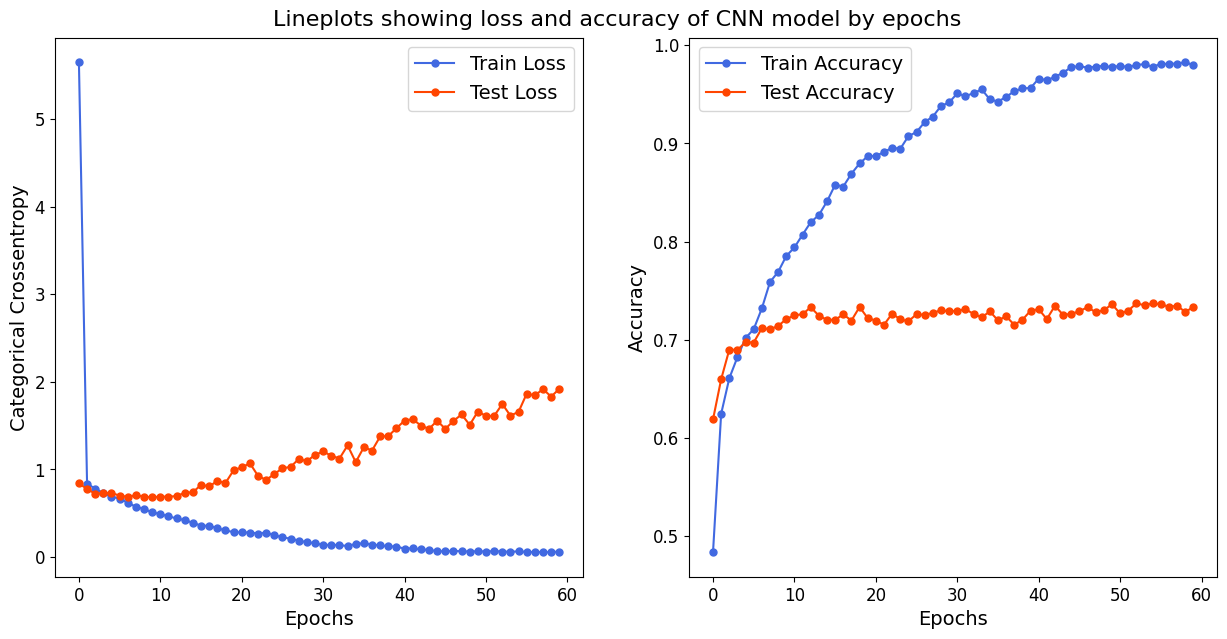

In [62]:
draw_train_loss(fifth_cnn_history)

In [69]:
sixth_cnn = Sequential()
sixth_cnn.add(Conv2D(filters=32, kernel_size=5, padding='same', activation='relu', input_shape=(50, 50, 3)))    # 3rd dim = 1 for grayscale images.
sixth_cnn.add(MaxPool2D(pool_size=(2,2)))
sixth_cnn.add(Conv2D(filters=64, kernel_size=5, padding='same', activation='relu'))
sixth_cnn.add(MaxPool2D(pool_size=(2,2)))
sixth_cnn.add(GlobalAveragePooling2D())
sixth_cnn.add(Dense(128, activation='relu'))
sixth_cnn.add(Dropout(0.25))
sixth_cnn.add(Dense(64, activation='relu'))
sixth_cnn.add(Dense(4, activation='softmax'))
sixth_cnn.summary()

c:\Users\Ahmad\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_19"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_65 (Conv2D)              │ (None, 50, 50, 32)     │         2,432 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_10 (MaxPooling2D) │ (None, 25, 25, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_66 (Conv2D)              │ (None, 25, 25, 64)     │        51,264 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_11 (MaxPooling2D) │ (None, 12, 12, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_11     │ (None, 64)             │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_35 (Dense)                │ (None, 128)            │         8,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_11 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_36 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_37 (Dense)                │ (None, 4)              │           260 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 70,532 (275.52 KB)

 Trainable params: 70,532 (275.52 KB)

 Non-trainable params: 0 (0.00 B)

In [70]:
sixth_cnn_history = compile_and_fit(sixth_cnn)

Epoch 1/60
32/32 ━━━━━━━━━━━━━━━━━━━━ 27s 785ms/step - accuracy: 0.3756 - loss: 5.9925 - val_accuracy: 0.5502 - val_loss: 0.9997
Epoch 2/60
32/32 ━━━━━━━━━━━━━━━━━━━━ 27s 852ms/step - accuracy: 0.5239 - loss: 0.9976 - val_accuracy: 0.5623 - val_loss: 0.9259
Epoch 3/60
32/32 ━━━━━━━━━━━━━━━━━━━━ 28s 863ms/step - accuracy: 0.5495 - loss: 0.9433 - val_accuracy: 0.5826 - val_loss: 0.8964
Epoch 4/60
32/32 ━━━━━━━━━━━━━━━━━━━━ 28s 892ms/step - accuracy: 0.5717 - loss: 0.9083 - val_accuracy: 0.6035 - val_loss: 0.8762
Epoch 5/60
32/32 ━━━━━━━━━━━━━━━━━━━━ 31s 956ms/step - accuracy: 0.5882 - loss: 0.8872 - val_accuracy: 0.6170 - val_loss: 0.8439
Epoch 6/60
32/32 ━━━━━━━━━━━━━━━━━━━━ 31s 978ms/step - accuracy: 0.6066 - loss: 0.8600 - val_accuracy: 0.6170 - val_loss: 0.8373
Epoch 7/60
32/32 ━━━━━━━━━━━━━━━━━━━━ 28s 890ms/step - accuracy: 0.6181 - loss: 0.8289 - val_accuracy: 0.6494 - val_loss: 0.7992
Epoch 8/60
32/32 ━━━━━━━━━━━━━━━━━━━━ 31s 974ms/step - accuracy: 0.6395 - loss: 0.8108 - val_accu

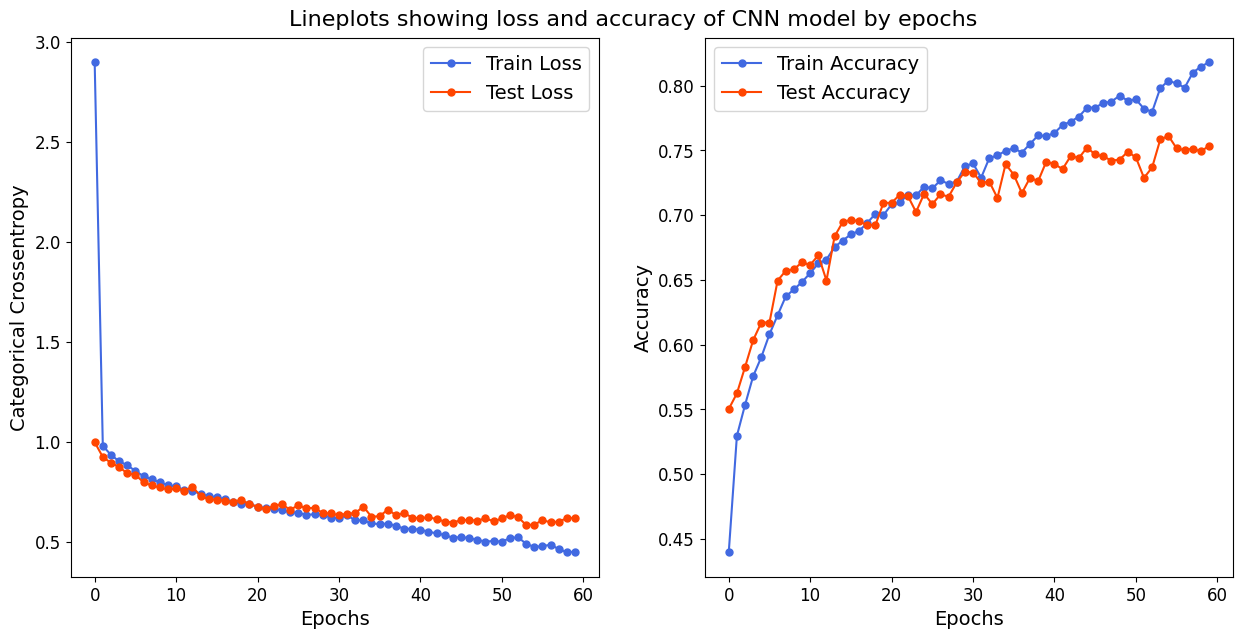

In [72]:
draw_train_loss(sixth_cnn_history)